In [5]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing datasets  
data_set = pd.read_excel(r"D:\Machine Learning\SVM\user_data.xlsx")

In [7]:
data_set.head()

,User ID,Gender,Age,Estimated Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
data_set.shape

(15, 5)

In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User ID           15 non-null     int64 
 1   Gender            15 non-null     object
 2   Age               15 non-null     int64 
 3   Estimated Salary  15 non-null     int64 
 4   Purchased         15 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 732.0+ bytes


In [10]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,15.0,1.567453e+07,77462.673797,15570769.0,15604760.0,15668575.0,15728042.0,15810944.0
Age,15.0,2.626667e+01,5.573748,18.0,22.5,26.0,29.5,35.0
Estimated Salary,15.0,6.153333e+04,34456.736158,18000.0,38000.0,58000.0,81000.0,150000.0
Purchased,15.0,6.666667e-02,0.258199,0.0,0.0,0.0,0.0,1.0


In [11]:
data_set['Purchased'].unique()

array([0, 1])

In [19]:
data_set['Purchased'].value_counts()

Purchased
0    14
1     1
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = data_set[data_set['Purchased'] == 0]
minority = data_set[data_set['Purchased'] == 1]

# Upsample minority class
minority_upsampled = resample(minority, 
                               replace=True,  # Sample with replacement
                               n_samples=len(majority),  # Match majority class size
                               random_state=42)  # For reproducibility

# Combine majority and upsampled minority
data_set = pd.concat([majority, minority_upsampled])

Purchased
0    14
1    14
Name: count, dtype: int64


In [23]:
data_set['Purchased'].value_counts()

Purchased
0    14
1    14
Name: count, dtype: int64

In [24]:
data_set.isnull().sum()

User ID             0
Gender              0
Age                 0
Estimated Salary    0
Purchased           0
dtype: int64

In [25]:
data_set.duplicated().sum()

np.int64(13)

In [15]:
data_set['Gender'] = data_set['Gender'].replace({'Male':1, 'Female':0})

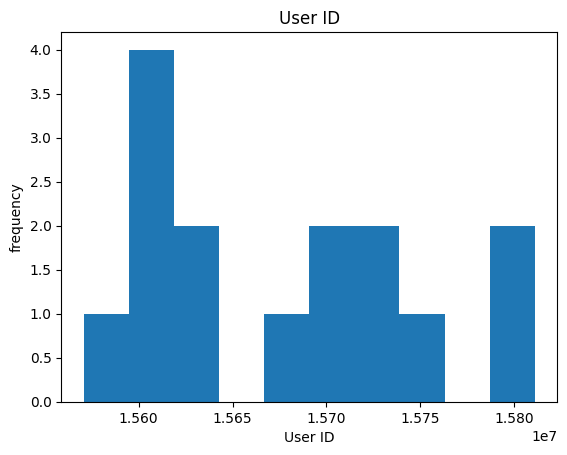

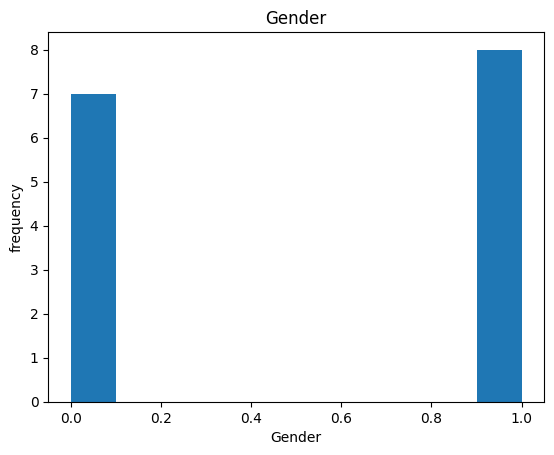

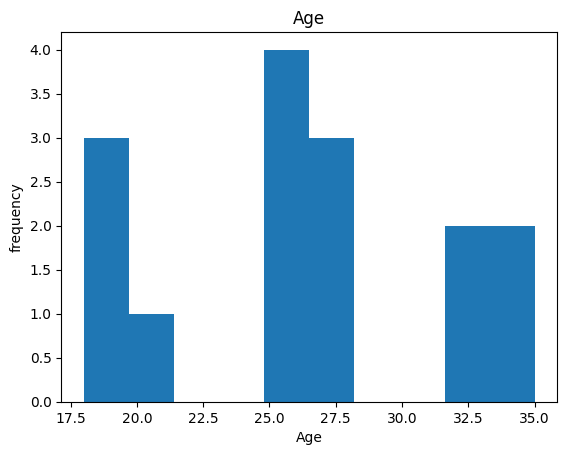

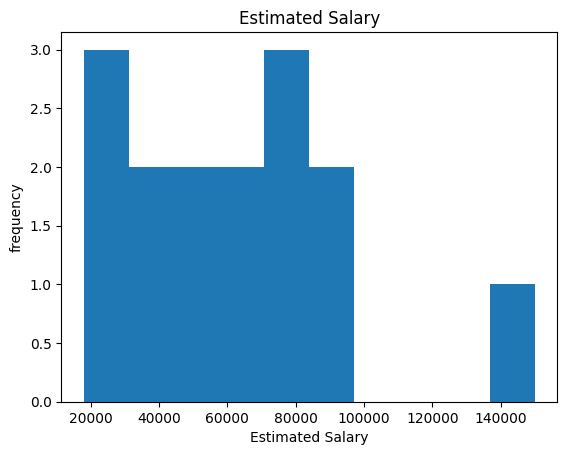

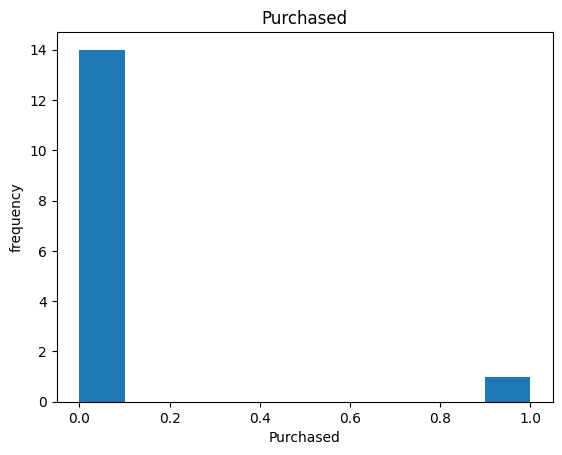

In [16]:
for col in data_set.columns:
    
    data_set[col].plot(kind='hist', title=col)
    mtp.ylabel('frequency')
    mtp.xlabel(col)
    mtp.show()

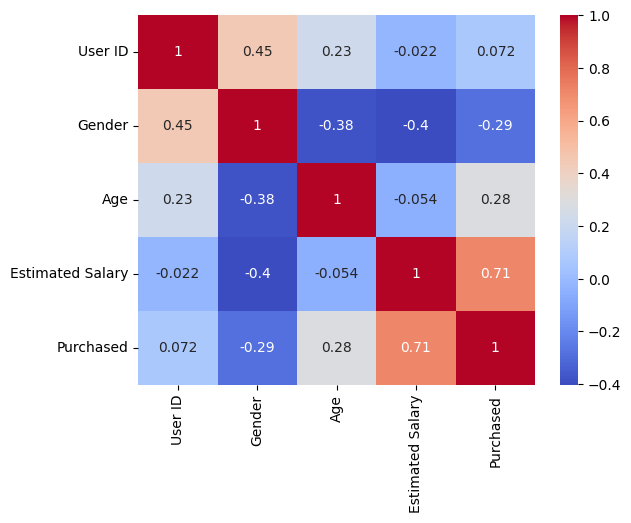

In [17]:
import seaborn as sns
corr = data_set.corr(method='pearson')
sns.heatmap(corr, 
            cmap='coolwarm',
            annot=True)
mtp.show()

In [41]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [1,2,3]].values  
y= data_set.iloc[:, 4].values

In [43]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)    

In [44]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [45]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=42)  
classifier.fit(x_train, y_train) 

SVC(kernel='linear', random_state=42)

In the above code, we have used kernel='linear', as here we are creating SVM for linearly separable data. However, we can change it for non-linear data. And then we fitted the classifier to the training dataset(x_train, y_train)

In [46]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  #After getting the y_pred vector, we can compare the result of y_pred and y_test to check the difference between the actual value and predicted value.
y_pred

array([0, 1, 0, 1, 0, 0, 1])

In [47]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)*100
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)

Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [48]:
data_set.head(1)

,User ID,Gender,Age,Estimated Salary,Purchased
0,15624510,1,19,19000,0


In [49]:
new_data = [[1,20,20000]]
model = classifier.predict(st_x.fit_transform(new_data))
print(model[0])

0
